In [4]:
#pip install kaggle

In [114]:
from sklearn.feature_selection import mutual_info_classif as mic
from sklearn.model_selection import train_test_split
from sklearn import metrics
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
%matplotlib inline

In [7]:
with zipfile.ZipFile('data/xploreml-gdsc-ml-study-jams.zip') as fref:
    fref.extractall('data/')

In [24]:
train_df = pd.read_csv('data/dataset.csv')
train_df.head(3)

,Unnamed: 0,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,ALERT_ID,IS_FRAUD
0,40088,40089,5417,3924,TRANSFER,539.21,6,-1,False
1,425743,425744,9772,5642,TRANSFER,176.72,64,-1,False
2,968569,968570,2485,2426,TRANSFER,525.05,146,-1,False


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992425 entries, 0 to 992424
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           992425 non-null  int64  
 1   TX_ID                992425 non-null  int64  
 2   SENDER_ACCOUNT_ID    992425 non-null  int64  
 3   RECEIVER_ACCOUNT_ID  992425 non-null  int64  
 4   TX_TYPE              992425 non-null  object 
 5   TX_AMOUNT            992425 non-null  float64
 6   TIMESTAMP            992425 non-null  int64  
 7   ALERT_ID             992425 non-null  int64  
 8   IS_FRAUD             992425 non-null  bool   
dtypes: bool(1), float64(1), int64(6), object(1)
memory usage: 61.5+ MB


In [25]:
train_df.describe()

,Unnamed: 0,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,ALERT_ID
count,9.924250e+05,9.924250e+05,992425.000000,992425.000000,9.924250e+05,992425.000000,992425.000000
mean,6.614218e+05,6.614228e+05,6026.243853,6806.620260,1.162903e+05,99.948883,-0.730260
std,3.820598e+05,3.820598e+05,2919.135408,2844.379972,1.321370e+06,57.538525,8.549525
min,0.000000e+00,1.000000e+00,1.000000,3.000000,0.000000e+00,0.000000,-1.000000
25%,3.304510e+05,3.304520e+05,3611.000000,4671.000000,2.384000e+01,50.000000,-1.000000
50%,6.614360e+05,6.614370e+05,6533.000000,7587.000000,1.567200e+02,100.000000,-1.000000
75%,9.921870e+05,9.921880e+05,8690.000000,9355.000000,4.400000e+02,150.000000,-1.000000
max,1.323233e+06,1.323234e+06,9999.000000,9999.000000,2.147484e+07,199.000000,399.000000


In [26]:
train_df.isnull().sum()

Unnamed: 0             0
TX_ID                  0
SENDER_ACCOUNT_ID      0
RECEIVER_ACCOUNT_ID    0
TX_TYPE                0
TX_AMOUNT              0
TIMESTAMP              0
ALERT_ID               0
IS_FRAUD               0
dtype: int64

In [62]:
train_df['TX_TYPE'].value_counts()

In [69]:
train_df.drop(labels=['TX_TYPE','Unnamed: 0','TX_ID'],axis=1,inplace=True)

In [65]:
train_df.value_counts()

TX_ID    SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID  TX_AMOUNT   TIMESTAMP  ALERT_ID  IS_FRAUD
1        6456               9069                 465.05      0          -1        0           1
881815   5724               3663                 119.19      133        -1        0           1
881780   3581               7495                 458.94      133        -1        0           1
881782   3595               870                  597.29      133        -1        0           1
881783   4337               3983                 3312364.25  133        -1        0           1
                                                                                             ..
440744   3421               9983                 507.32      67         -1        0           1
440745   3456               5718                 486.13      67         -1        0           1
440746   5469               9961                 507.63      67         -1        0           1
440747   783                9884             

In [70]:
train_df.head(3)

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,ALERT_ID,IS_FRAUD
0,5417,3924,539.21,6,-1,0
1,9772,5642,176.72,64,-1,0
2,2485,2426,525.05,146,-1,0


In [32]:
train_df['IS_FRAUD'].replace({False: 0, True: 1}, inplace=True)

In [67]:
train_df.head(3)

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,ALERT_ID,IS_FRAUD
0,40089,5417,3924,539.21,6,-1,0
1,425744,9772,5642,176.72,64,-1,0
2,968570,2485,2426,525.05,146,-1,0


In [71]:
train_df.IS_FRAUD.value_counts()

0    991143
1      1282
Name: IS_FRAUD, dtype: int64

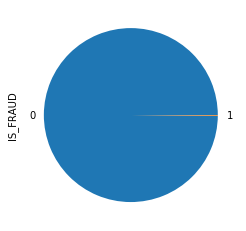

In [72]:
plt.figure()
train_df['IS_FRAUD'].value_counts().plot(kind='pie')

## Percent of Fraud cases

In [73]:
print((train_df[train_df['IS_FRAUD'] == 1]['IS_FRAUD'].sum())/train_df.shape[0]*100)

0.1291785273446356


## Cross Corelation

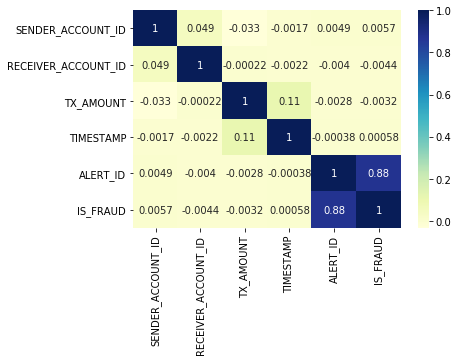

In [74]:

data_plot = sns.heatmap(train_df.corr(),cmap="YlGnBu",annot=True)

## Calculate mutual information

In [104]:
X = train_df.drop('IS_FRAUD',axis=1)
y = train_df['IS_FRAUD']

In [76]:
mutual_info = mic(train_df.drop('IS_FRAUD',axis=1),train_df['IS_FRAUD'])

In [68]:
len(train_df['TX_ID'].unique())

992425

In [77]:
mutual_info

array([0.00088711, 0.0010988 , 0.00765197, 0.00116057, 0.19053145])

In [94]:
cols = ['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 'TX_AMOUNT','TIMESTAMP', 'ALERT_ID']

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

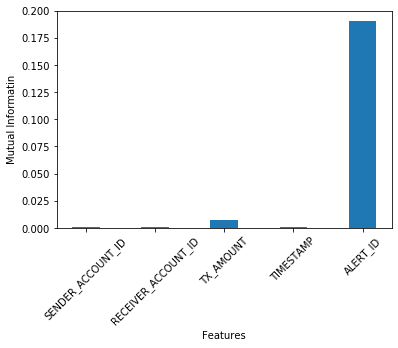

In [99]:
plt.figure()
plt.bar(cols,mutual_info,width=0.4)
plt.xlabel('Features')
plt.ylabel('Mutual Informatin')
plt.xticks(rotation=45)

As we have unbalanced dataset we could either choose Tree based algorithm or upsample data

# Train Model

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
import xgboost as xgb

In [109]:
def train_xgb_model(parameters):
    model = xgb.XGBClassifier(n_estimators = parameters['n_estimator'],objective = parameters['objective'], colsample_bytree = parameters['colsample_bytree'], learning_rate = parameters['learning_rate'],
                max_depth = parameters['max_depth'], alpha = parameters['alpha'])
    return model
def fit_model(model,X_train,y_train):
    model.fit(X_train,y_train)
    
def predict_results(model,X):
    predicted_values = model.predict(X)
    return predicted_values
    
    
def retune_model(model,hyperparameter_grid,X_train,y_train):
        
        grid_search_cv = RandomizedSearchCV(
        estimator=model,
        param_distributions=hyperparameter_grid,
        cv=10,n_iter=100,
        scoring = 'neg_mean_absolute_error',
        n_jobs=4,
        verbose=5,
        return_train_score=True,
        random_state=42
        )
        grid_search_cv.fit(X_train,y_train)
        return grid_search_cv
    

In [110]:
parameters = {'objective' :'reg:squarederror', 'colsample_bytree' : 0.3, 'learning_rate' : 0.1,
                'max_depth' : 5, 'alpha' : 10, 'n_estimator' : 10}
model_1 = train_xgb_model(parameters)
fit_model(model_1,X_train,y_train)
model_1.fit(X_train,y_train)
y_pred = predict_results(model_1,X_test)

In [116]:
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[327104      0]
 [   240    157]]


In [120]:
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    327104
           1       1.00      0.40      0.57       397

    accuracy                           1.00    327501
   macro avg       1.00      0.70      0.78    327501
weighted avg       1.00      1.00      1.00    327501



# Prediction 

In [121]:
test_df = pd.read_csv('data/test_data.csv')
test_df.head(3)

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,ALERT_ID
0,681873,5752,9735,TRANSFER,153.91,103,-1
1,692989,7666,9356,TRANSFER,102.33,105,-1
2,1169181,8632,8029,TRANSFER,197.03,176,-1


In [133]:
test1 = pd.read_csv('data/test_data.csv')

In [122]:
test_df.drop(labels=['TX_TYPE','TX_ID'],axis=1,inplace=True)

In [124]:
test_df.head()

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,ALERT_ID
0,5752,9735,153.91,103,-1
1,7666,9356,102.33,105,-1
2,8632,8029,197.03,176,-1
3,9736,7993,141.24,38,-1
4,7108,9805,14.78,135,-1


In [125]:
y_pred = predict_results(model_1,test_df)

# Submission file

In [126]:
sub_df = pd.read_csv('data/sample_submission.csv')
sub_df.head(3)

,TX_ID,IS_FRAUD
0,681873,False
1,692989,True
2,1169181,True


In [131]:
y_pred = list(y_pred)
y_pred.replace({0 : False,1: True}, inplace=True)

AttributeError: 'list' object has no attribute 'replace'

In [134]:
submission = sub_df.copy()
submission['TX_ID'] = test1['TX_ID']
submission['IS_FRAUD'] = y_pred

In [137]:
submission.to_csv('submission/submission1.csv',index=False)

In [136]:
pwd

'/root/kaggleCompetetions/kaggle-competitions/XPloreML'